In [ ]:
# Write half-hourly GPP, Reco, NEP and ET OzFlux data to csv

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import netCDF4
import numpy as np
import re
import datetime
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
##Sets up arrays used for loops
#Sites to loop through each location
#Sites = ['Tumbarumba','Warra','WombatStateForest','CumberlandPlain']
Sites = ['Tumbarumba']
Vars = ['GPP_SOLO', 'NEP_SOLO', 'ET', 'ER_SOLO']
csvVars = ['GPP', 'NEP', 'evap', 'Reco']

In [3]:
##sets up default info
#puts everything into an overarching dataframe
def Setup_Default(site, Everything, Vars):
##Sets up file info in nc
    print(site)
#    url='http://dap.ozflux.org.au/thredds/fileServer/ozflux/sites/' + site + '/L6/default/' + site + '_L6.nc'
    url='http://dap.ozflux.org.au/thredds/dodsC/ozflux/sites/' + site + '/L6/default/' + site + '_L6.nc'
    nc = netCDF4.Dataset(url,'r')
    nc.set_auto_mask(False)
    times = nc.variables['time']
    jd = netCDF4.num2date(times[:],times.units,)
##Loop over variable type 
    for x in range (0,len(Vars)):
##Try catches any that are found, except prevents stops
##saves into dataframe, remmoves outliers, resamples into monthly and annual dataframes
        Name = Vars[x]     
        QCFlagName = Name + '_QCFlag'
        print(Name,' ',QCFlagName)
        try:
            h = nc.variables[Name]
            Everything[Name] = pd.Series(h[:,0,0], index = jd)
            h = nc.variables[QCFlagName]
            Everything[QCFlagName] = pd.Series(h[:,0,0], index = jd)
            Everything.loc[Everything[QCFlagName] != 0, Name] = -9999.0  # replace data without QCFlag=0 with -9999
        except KeyError:
            Filler = 0

In [11]:
##exports info to csv
#one file for every processing type
def Export_to_csv(site, Vars, csvVars):
    Compiled = pd.DataFrame()
    Compiled_Plot = pd.DataFrame()
    fig=plt.figure(figsize=(10, 6.7))
    path = './'
    for y in range (0,len(csvVars)):
##Checks if it has data for each variable
        try:
            ##Sorts info for each file to Compiled dataframe
            Compiled[csvVars[y]] = Everything[Vars[y]]
        except KeyError:
            FillerNUM = 1      
#if no data is found for the site, doesn't create an empty csv
    if Compiled.empty:
        fillerNum = 1
##prints compiled data to csv
    else:
        Compiled['date'] = Compiled.index    
        if (site == 'WombatStateForest'):
            Compiled.loc[Compiled['date'] == datetime.datetime(2016,1,24,2,30),['GPP','NEP','Reco']] = -9999.0
        Compiled['Year'] = Compiled.date.dt.year
        Compiled['Month'] = Compiled.date.dt.month
        Compiled['Day'] = Compiled.date.dt.day
        Compiled['Hour'] = Compiled.date.dt.hour
        if (site != 'Tumbarumba'):
            Compiled['Minute'] = Compiled.date.dt.minute
        Compiled_Plot = Compiled.copy()    
        Compiled_Plot.replace(to_replace=-9999.0, value=np.NaN, inplace=True)
        for y in range (0,len(csvVars)):
            if not Compiled_Plot[csvVars[y]].isnull().all():
                print('plot ',csvVars[y])
                ax = plt.subplot2grid((4,1),(y, 0))    
                ax.plot(Compiled_Plot.date.dt.date,Compiled_Plot[csvVars[y]])
                ax.set_title(site+' '+csvVars[y]+' - zero flag',size=12.0) 
        plt.tight_layout()
        plt.show() 
        plotflnm = path + site + '_zeroflag.pdf'
        fig.savefig(plotflnm) #,dpi=fig.dpi, bbox_inches='tight')
        plt.close(fig)    
        #Compiled = Compiled.drop(columns = ['date'])
        del Compiled['date']
        if (site != 'Tumbarumba'):
            Compiled.set_index(['Year', 'Month', 'Day', 'Hour', 'Minute'], inplace = True)
        else:
            Compiled.set_index(['Year', 'Month', 'Day', 'Hour'], inplace = True)
        if (site == 'Tumbarumba'):
            tres = 'Hourly'
        else:
            tres = 'HalfHourly'
        flnm = path + site + '_' + tres + '.csv'
        print('writing to file ',flnm)
        Compiled.to_csv(flnm, sep=',', index = True)

Tumbarumba
GPP_SOLO   GPP_SOLO_QCFlag
NEP_SOLO   NEP_SOLO_QCFlag
ET   ET_QCFlag
ER_SOLO   ER_SOLO_QCFlag
plot  GPP
plot  NEP
plot  evap
plot  Reco


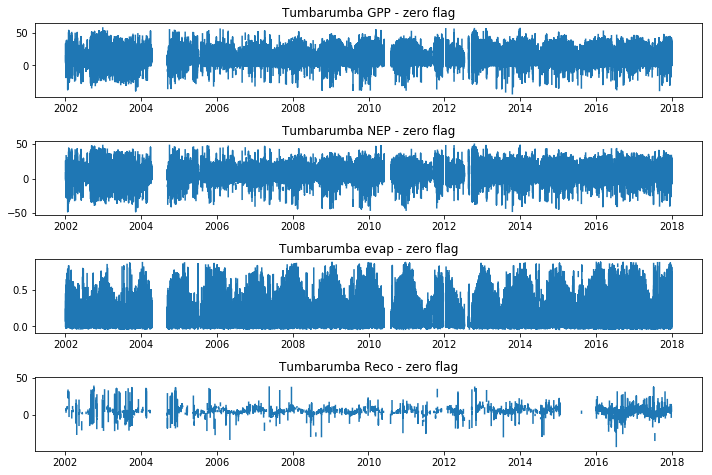

writing to file  ./Tumbarumba_Hourly.csv


In [12]:
for A in range (0, len(Sites)):
##Sets up dataframes
    Everything = pd.DataFrame() 
    Setup_Default(Sites[A], Everything, Vars)
    #print(Everything[:5])
    Export_to_csv(Sites[A], Vars, csvVars)

In [123]:
site = 'Warra'
url='http://dap.ozflux.org.au/thredds/dodsC/ozflux/sites/' + site + '/L6/default/' + site + '_L6.nc'
nc = netCDF4.Dataset(url,'r')
nc.set_auto_mask(False)
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    _NCProperties: version=1|netcdflibversion=4.4.1|hdf5libversion=1.8.17
    BulkDensity: 950
    EPDversion: 2.7.12 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
    FgDepth: 0.08
    Functions: ,do_linear, TaFromTv, CalculateMetVars, CoordRotation2D, CalculateFluxes, FhvtoFh, CorrectFgForStorage,RangeCheck,do_qcchecks, GapFillFromClimatology, GapFillFromalternate, GapFillUsingSOLO, ERUsingSOLO, ERUsingFFNET
    OrganicContent: 0.045
    QC_version: PyFluxPro V0.1.2
    SwsDefault: 0.15
    SwsSeries: ['Sws']
    acknowledgement: This work used eddy covariance data collected by the TERN-OzFlux facility. OzFlux
would like to acknowledge the financial support of the Australian Federal Government via
the National Collaborative Research Infrastructure Scheme and the Education Investment
Fund.
    canopy_height: 55m
    comment: CF metadata, O

In [142]:
print(nc.variables['ET'].units)

mm
